In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%load_ext autoreload
%autoreload 2

In [2]:
from bokeh.sampledata.autompg import autompg as df
t = Table.from_df(df)

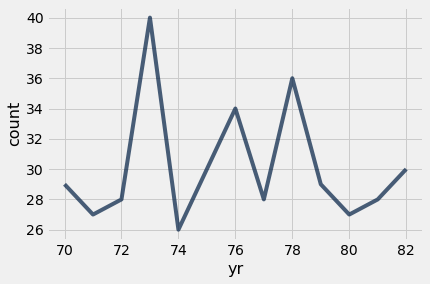

In [3]:
t.group('yr').plot('yr')

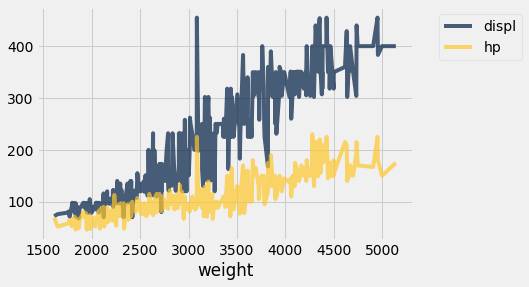

In [4]:
t.plot('weight', ['displ', 'hp'])

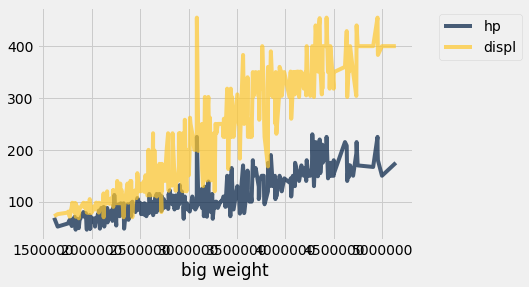

In [5]:
t.with_column('big weight', t['weight'] * 1000).plot('big weight', ['hp', 'displ'])

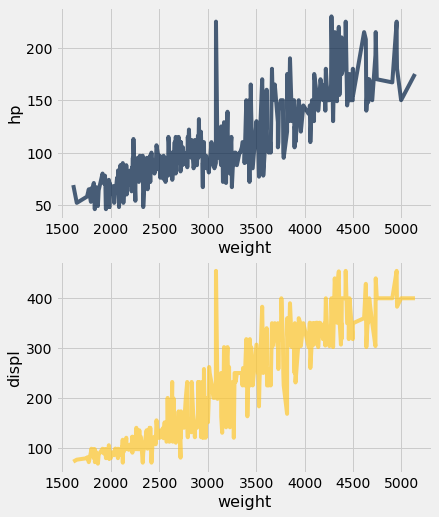

In [6]:
t.plot('weight', ['hp', 'displ'], overlay=False)

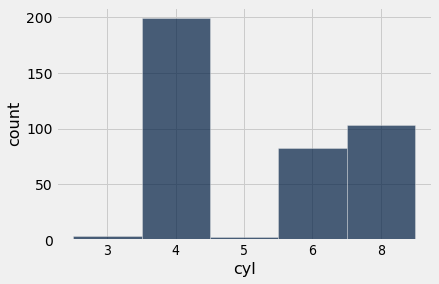

In [7]:
t.group_bar('cyl')

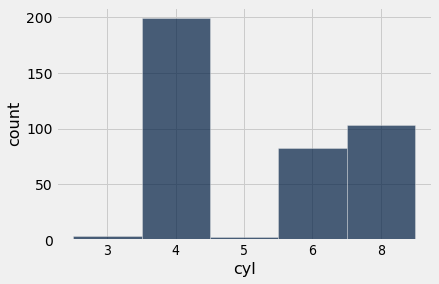

In [8]:
t.group('cyl').bar('cyl')

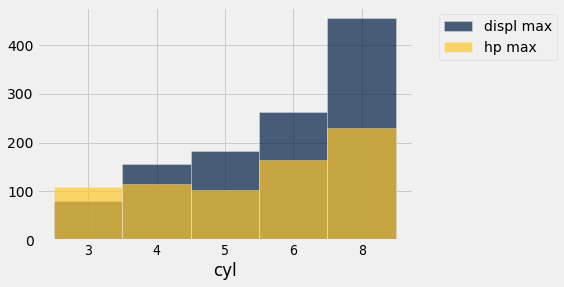

In [9]:
t.select(['cyl', 'displ', 'hp']).group('cyl', max).bar('cyl')

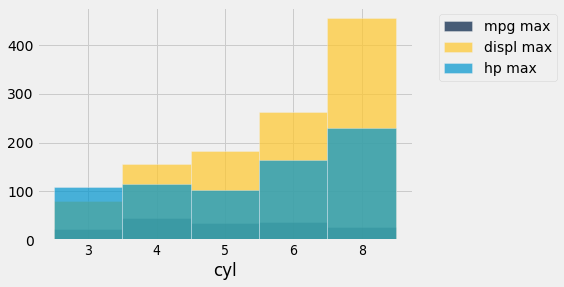

In [10]:
t.group('cyl', max).bar('cyl', [1, 2, 3])

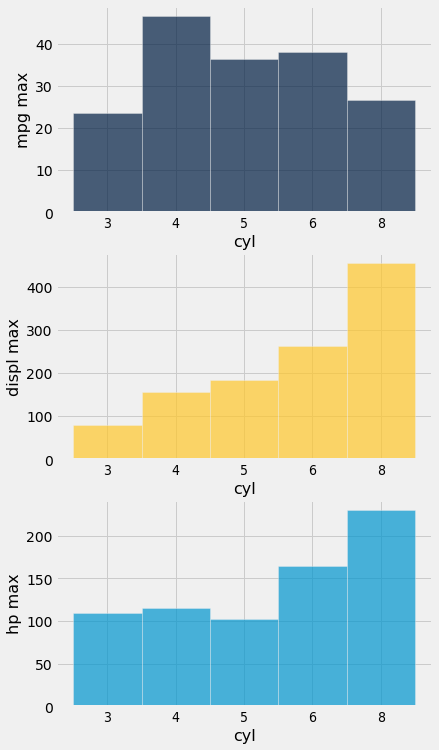

In [11]:
t.group('cyl', max).bar('cyl', [1, 2, 3], overlay=False)

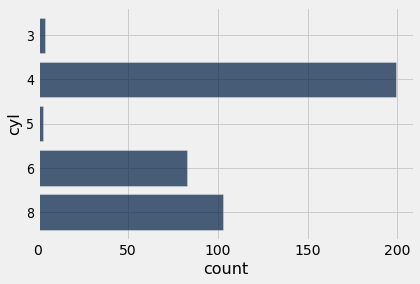

In [12]:
t.group_barh('cyl')

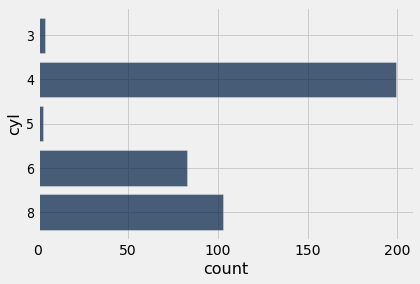

In [13]:
t.group('cyl').barh('cyl')

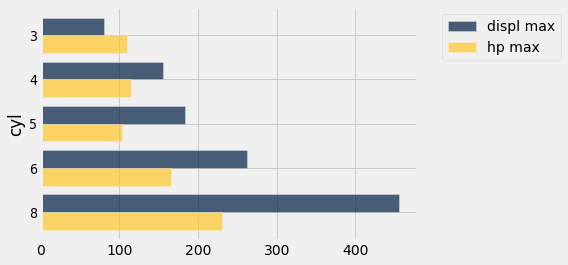

In [14]:
t.select(['cyl', 'displ', 'hp']).group('cyl', max).barh('cyl')

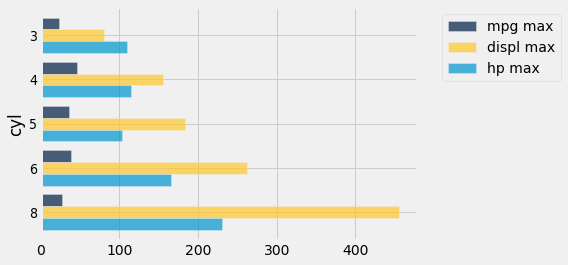

In [15]:
t.group('cyl', max).barh('cyl', [1, 2, 3])

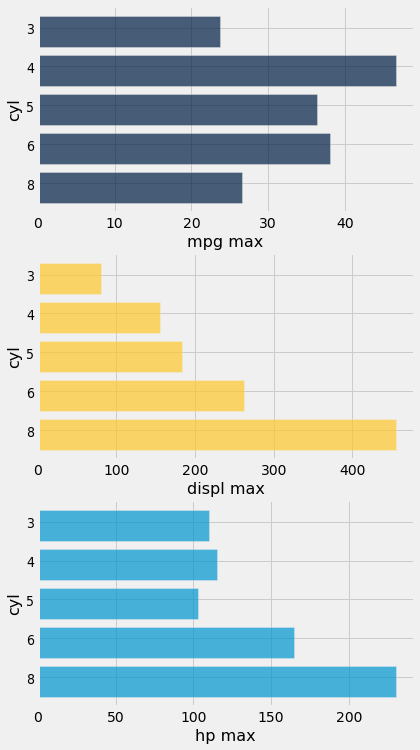

In [16]:
t.group('cyl', max).barh('cyl', [1, 2, 3], overlay=False)

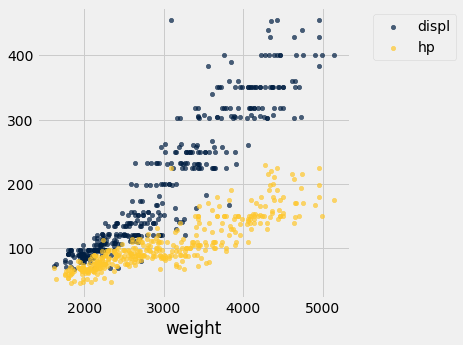

In [17]:
t.select(['weight', 'displ', 'hp']).scatter('weight')

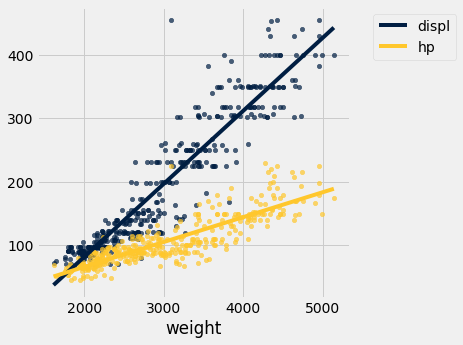

In [18]:
t.select(['weight', 'displ', 'hp']).scatter('weight', fit_line=True)

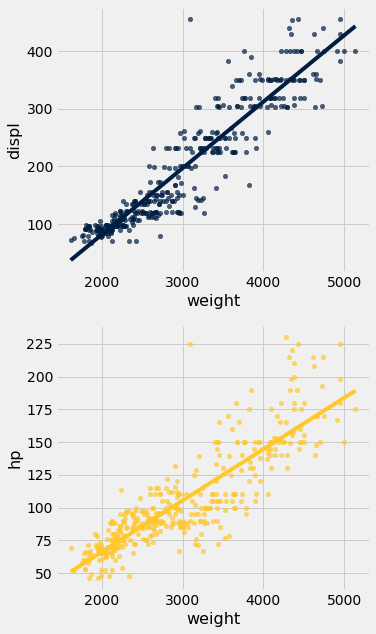

In [19]:
t.select(['weight', 'displ', 'hp']).scatter('weight', fit_line=True, overlay=False)

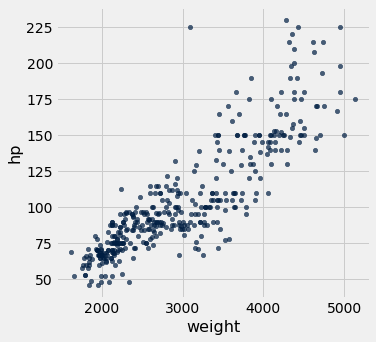

In [20]:
t.scatter('weight', 'hp')

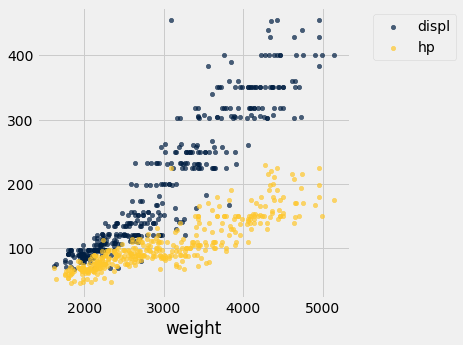

In [21]:
t.scatter('weight', [2, 3])

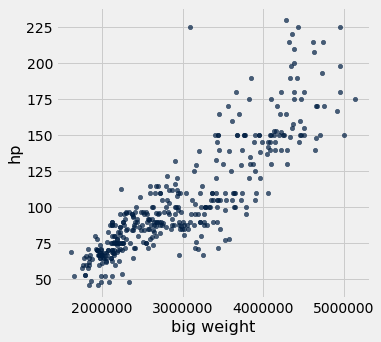

In [22]:
t.with_column('big weight', t['weight'] * 1000).scatter('big weight', 'hp')

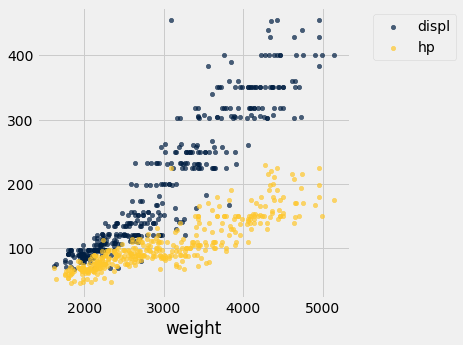

In [23]:
t.scatter('weight', ['displ', 'hp'])

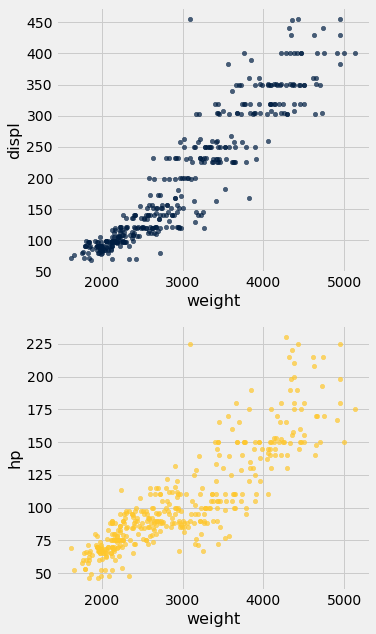

In [24]:
t.scatter('weight', ['displ', 'hp'], overlay=False)

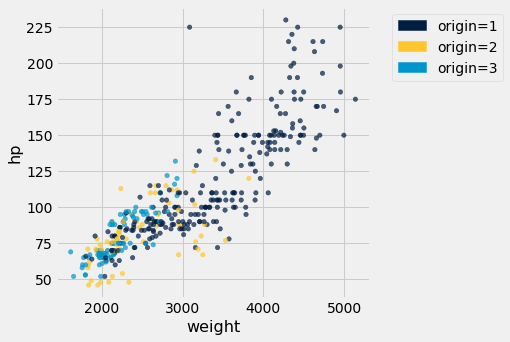

In [25]:
# Check that grouping in scatter works just like grouping in histograms and that the legends are the same format
t.scatter("weight", "hp", group="origin")

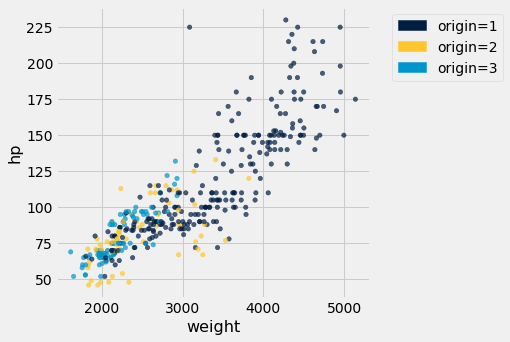

In [26]:
t.scatter("weight", "hp", colors="origin")

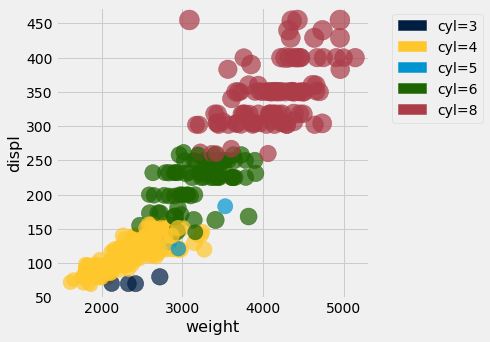

In [27]:
t.drop('name').scatter('weight', 'displ', sizes='hp', s=200, group='cyl')

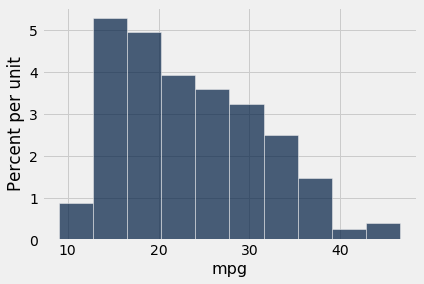

In [28]:
t.hist('mpg')

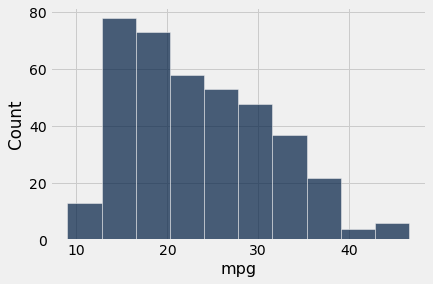

In [29]:
f = t.hist('mpg', normed=False)

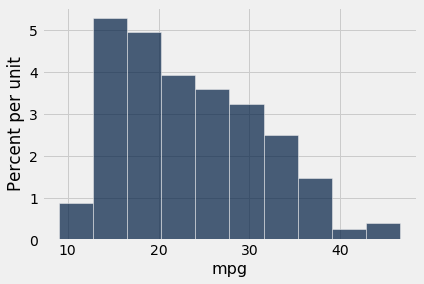

In [30]:
t.hist('mpg', overlay=False)

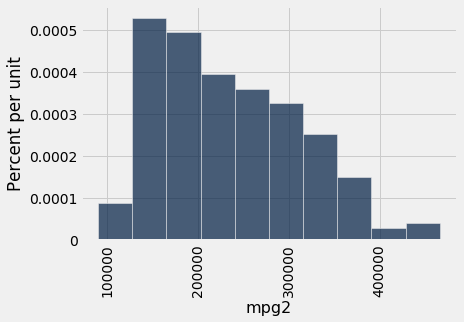

In [31]:
f = t.with_column('mpg2', t['mpg'] * 10000).hist('mpg2')

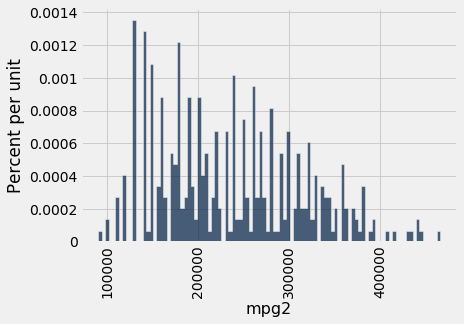

In [32]:
f = t.with_column('mpg2', t['mpg'] * 10000).hist('mpg2', bins=100)

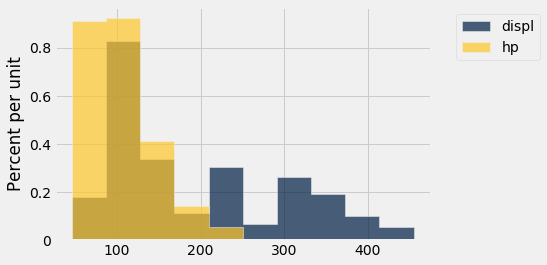

In [33]:
t.hist(['displ', 'hp'])

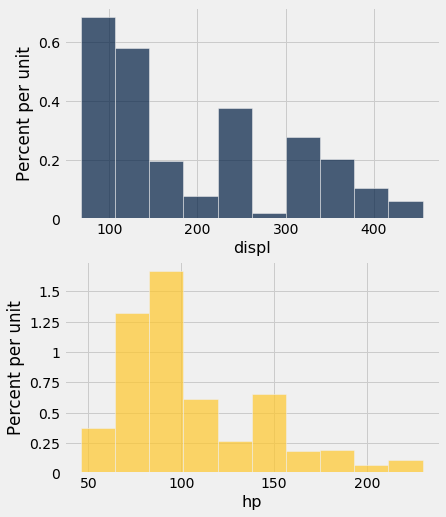

In [34]:
t.hist(['displ', 'hp'], overlay=False)

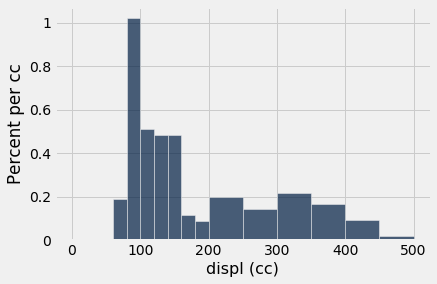

In [35]:
bins = np.append(np.arange(0, 200, 20), np.arange(200, 501, 50))
t.hist('displ', bins=bins, unit='cc')

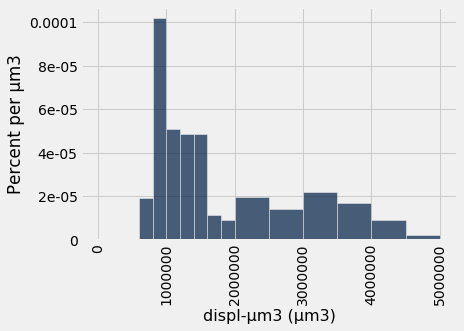

In [36]:
t.with_column('displ-µm3', t['displ'] * 10000).hist('displ-µm3', bins=bins*10000, unit='µm3')

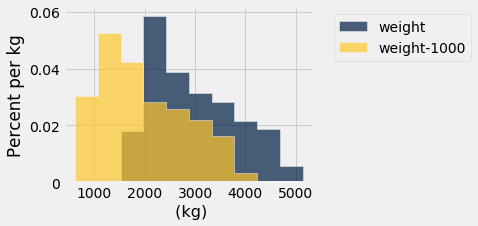

In [37]:
t.with_column('weight-1000', t['weight']-1000).hist(['weight', 'weight-1000'], unit='kg', width=4, height=3)

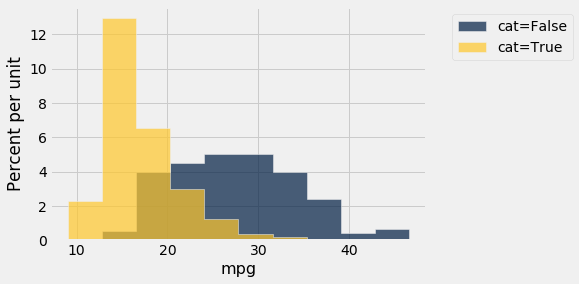

In [38]:
two_cats = t.with_column('cat', t['hp'] > 100)
two_cats.hist('mpg', group='cat')

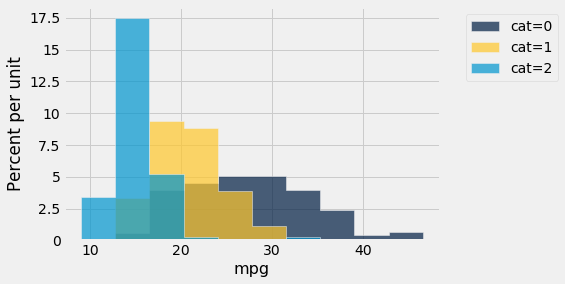

In [39]:
more_cats = t.with_column('cat', [str(c) for c in (t['hp'] > 100).astype(int) + (t['hp'] > 120).astype(int)])
more_cats.hist('mpg', group='cat')

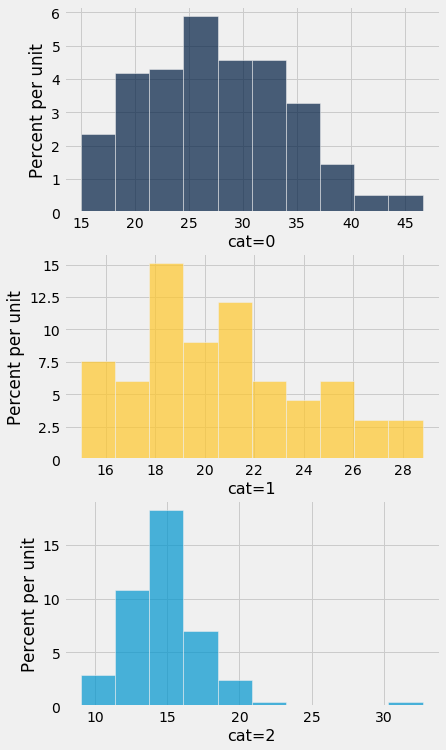

In [40]:
more_cats.hist('mpg', group='cat', overlay=False)

/home/daw/datascience/datascience/datascience/tables.py:2456: UserWarning: pivot_hist is deprecated; use hist(value_column_label, group=pivot_column_label), or with side_by_side=True if you really want side-by-side bars.
  warnings.warn("pivot_hist is deprecated; use "


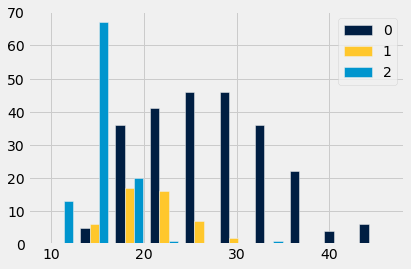

In [41]:
more_cats.pivot_hist('cat', 'mpg')

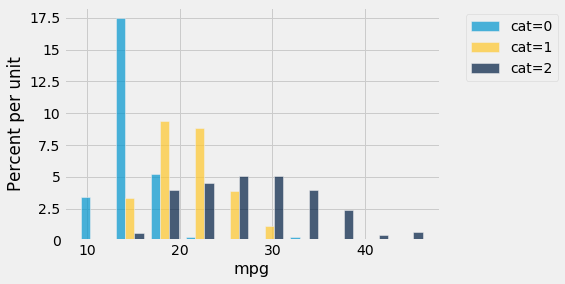

In [42]:
more_cats.hist('mpg', group='cat', side_by_side=True)

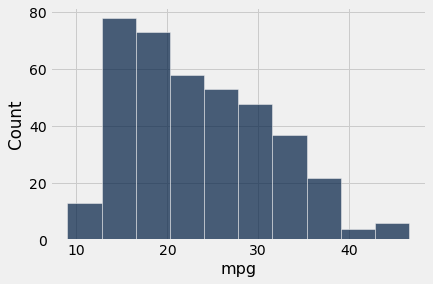

In [43]:
more_cats.hist_of_counts('mpg')

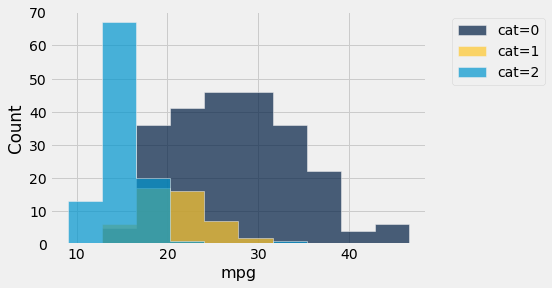

In [44]:
more_cats.hist_of_counts('mpg', group='cat')

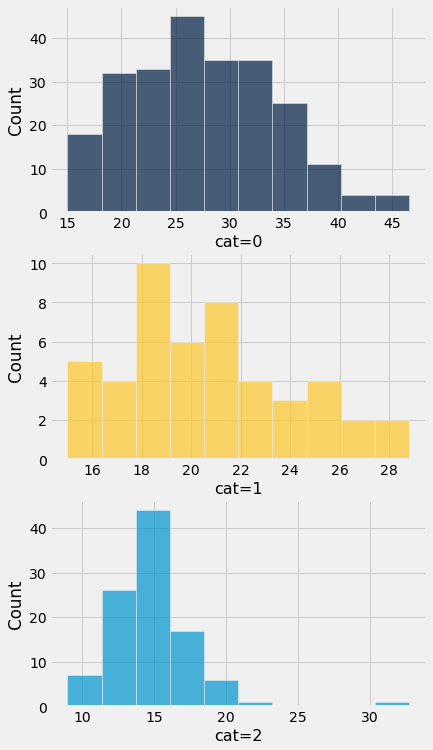

In [45]:
more_cats.hist_of_counts('mpg', group='cat', overlay=False)

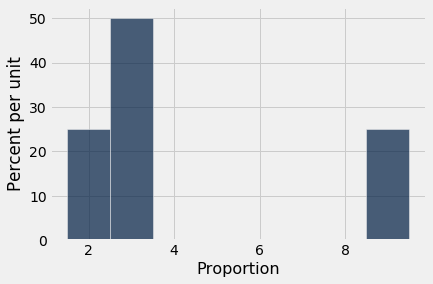

In [46]:
label_t = Table().with_columns(
    'Value', make_array(2, 3, 9),
    'Proportion', make_array(0.25, 0.5, 0.25)
)

label_t.hist(bin_column='Value', bins=np.arange(1.5, 9.6, 1))

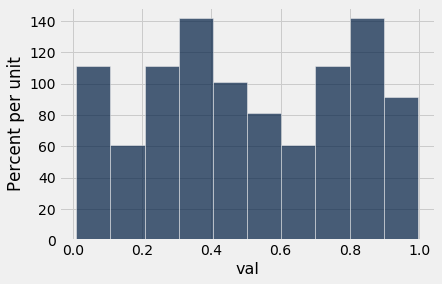

In [47]:
# Test numerical labels aren't showing error term
t = Table().with_column("val", np.random.uniform(size=100))
t.hist()

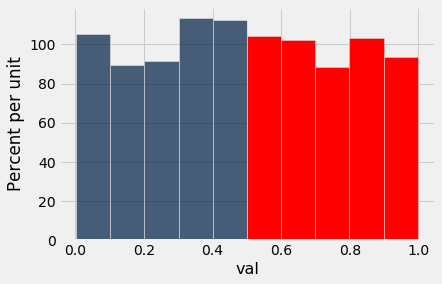

In [48]:
# Testing histogram shading
t = Table().with_column("val", np.random.uniform(size=1000))
t.hist(left_end=0.5)

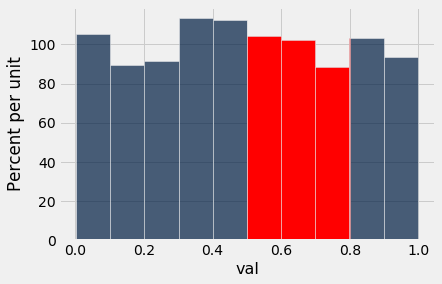

In [49]:
t.hist(left_end=0.5, right_end=0.8)

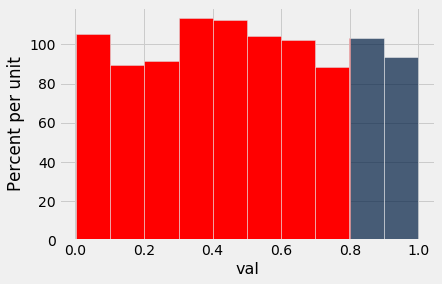

In [50]:
t.hist(right_end=0.8)

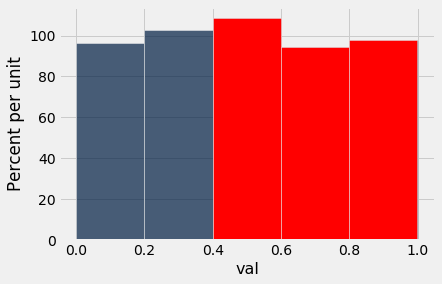

In [51]:
bins = np.arange(0, 1.1, 0.2)
t.hist(bins=bins, left_end=0.4)

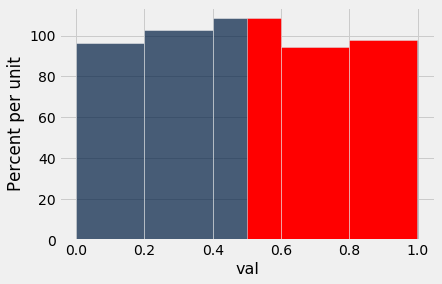

In [52]:
t.hist(bins=bins, left_end=0.5)

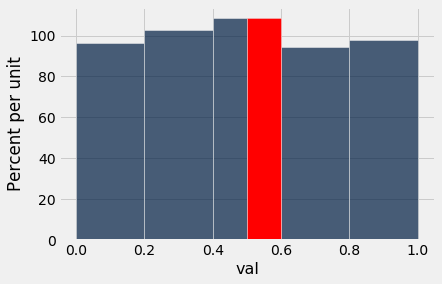

In [53]:
t.hist(bins=bins, left_end=0.5, right_end=0.6)


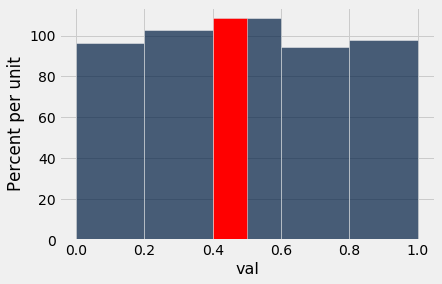

In [54]:
t.hist(bins=bins, left_end=0.4, right_end=0.5)


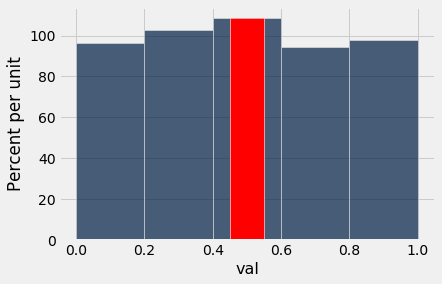

In [55]:
t.hist(bins=bins, left_end=0.45, right_end=0.55)

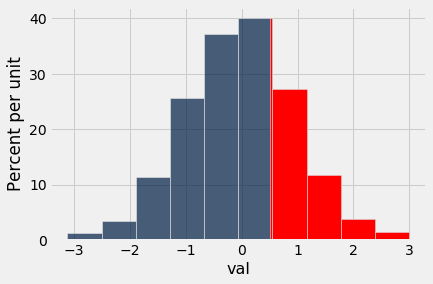

In [56]:
# Testing histogram shading, pt. 2
t2 = Table().with_column("val", np.random.normal(size=1000))
t2.hist(left_end=0.5)

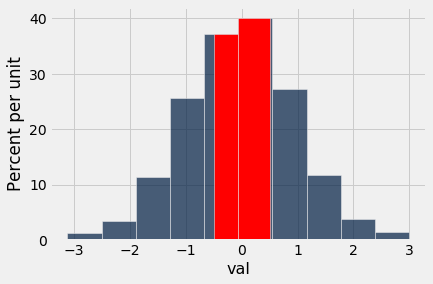

In [57]:
t2.hist(left_end=-0.5, right_end=0.5)

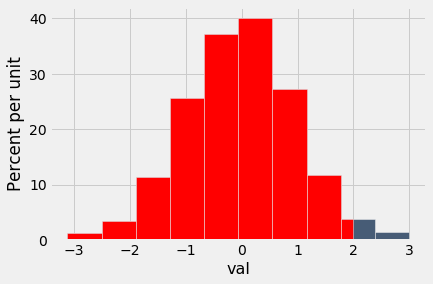

In [58]:
t2.hist(right_end=2)

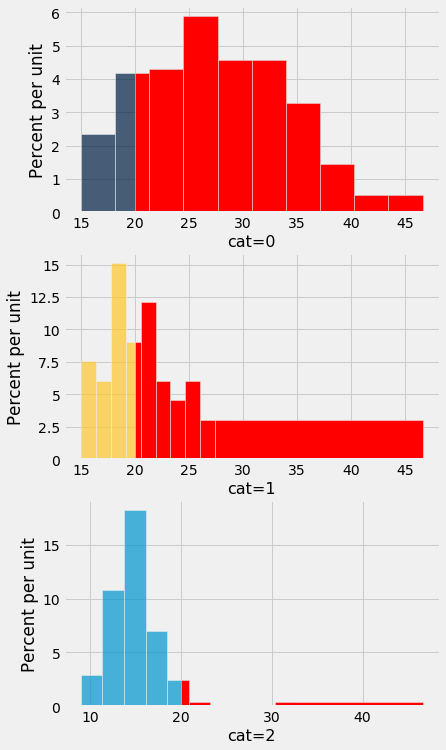

In [59]:
# Testing shaded histograms, pt. 3
more_cats.hist('mpg', group='cat', overlay=False, left_end=20)

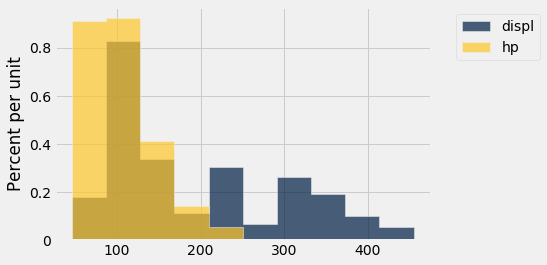

In [60]:
more_cats.hist(['displ', 'hp'], left_end=150)